In [1]:
#import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


default_log_name='data_validation.log'
onboarded_dir='../../data/processed/'
onboarded_file='Merged_dataset.csv'
le = LabelEncoder()

In [2]:
# read dataset
df = pd.read_csv(os.path.join(onboarded_dir, onboarded_file))
df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_13932\342745817.py:2: DtypeWarning: Columns (1,3,9,10,11,16,18,19,23,24,25,26,42,56,57,58,61,62,63,64,65,66,75,76,77,78,113,123,124,127,185,188,189,192,195,197,198,201,204,210,213,217,225,234,238,240,243,247,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(onboarded_dir, onboarded_file))


(11448, 314)

## Describe Dataset

In [3]:
df.head()

,Subject,Screening Number,Age,BMI,Ethnicity_1,Gender,Sequence,Tx,Visit,Time,...,PAA3OH,PAA4OH,PAAOCH,PPA3OCH4Oglc,PPA4OCH3Oglc,PPA4OH,PPAdiOH,PPAOCH,Unnamed: 9,Unnamed: 10
0,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Columns: 314 entries, Subject to Unnamed: 10
dtypes: float64(257), object(57)
memory usage: 27.4+ MB


### Filter dataset by category
#### Working with AV2 dataset

In [5]:
'''Code snippet by Mike (changed)'''
def filter_dataset(data,filter_name):
    filtered_data = data[data.iloc[:, 0].fillna("").astype(str).str.startswith(filter_name)]  # Filter based on the first column  
    return filtered_data
    
# Example usage
filter_name = "AV2"  # Replace with dataset name
filtered_df = filter_dataset(df,filter_name)   # df is the dataframe or csv we loaded

filtered_df.head()

,Subject,Screening Number,Age,BMI,Ethnicity_1,Gender,Sequence,Tx,Visit,Time,...,PAA3OH,PAA4OH,PAAOCH,PPA3OCH4Oglc,PPA4OCH3Oglc,PPA4OH,PPAdiOH,PPAOCH,Unnamed: 9,Unnamed: 10
7806,AV2_291001,NaN,45.0,37.9,NaN,F,NaN,NaN,WK0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7807,AV2_291001,NaN,45.0,37.9,NaN,F,NaN,NaN,WK0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7808,AV2_291001,NaN,45.0,37.9,NaN,F,NaN,NaN,WK0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7809,AV2_291001,NaN,45.0,37.9,NaN,F,NaN,NaN,WK0,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7810,AV2_291001,NaN,45.0,37.9,NaN,F,NaN,NaN,WK0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
filtered_df.shape

(876, 314)

In [7]:
filtered_df.isnull().sum()

Subject               0
Screening Number    876
Age                   0
BMI                  15
Ethnicity_1         876
                   ... 
PPA4OH              876
PPAdiOH             876
PPAOCH              876
Unnamed: 9          876
Unnamed: 10         876
Length: 314, dtype: int64

### Remove Nulls

In [8]:

def drop_columns_if_all_null(df,threshold=0.8):

    # Calculate the percentage of null values in each column
    null_percentages = df.isnull().mean()
    # Get the column names where the null percentage exceeds the threshold
    columns_to_drop = null_percentages[null_percentages >= threshold].index
    # Drop the columns from the DataFrame
    df_cleaned = df.drop(columns=columns_to_drop)

    # # Drop columns where all values are null
    # df_cleaned = df.dropna(axis=1, how='all')

    # drop cols where all zero
    zero_columns = df_cleaned.columns[(df_cleaned == 0).all()]
    df_cleaned.drop(zero_columns, axis=1, inplace=True)

    return df_cleaned

# Drop columns with all null values
df_cleaned = drop_columns_if_all_null(filtered_df,threshold=0.8)
print(df_cleaned.shape)

(876, 11)


In [9]:
df_cleaned.describe()

,Age,Glc,BodyWt,Ins
count,876.000000,830.000000,861.000000,830.000000
mean,42.164384,131.902446,93.567654,60.589470
std,11.473016,36.425792,15.951722,59.369062
min,25.000000,54.260000,63.100000,1.860000
25%,33.000000,103.957500,80.100000,11.872500
50%,41.000000,122.365000,93.200000,46.445000
75%,52.000000,156.812500,106.300000,85.182500
max,64.000000,292.130000,132.700000,378.960000


### Label encode some columns

In [10]:
# function to check unique values in each column and label encode them
def check_unique_values(df):
    for col in df.columns:
        if df[col].nunique() < 10:
            df[col] = le.fit_transform(df[col])

    return df

filtered_df_null_encoded = check_unique_values(df_cleaned)

In [11]:
filtered_df_null_encoded.head()

,Subject,Age,BMI,Gender,Visit,Time,Glc,TX,Race,BodyWt,Ins
7806,AV2_291001,45.0,37.9,0,0,0.0,106.69,1,0,106.3,13.00
7807,AV2_291001,45.0,37.9,0,0,0.5,157.41,1,0,106.3,82.74
7808,AV2_291001,45.0,37.9,0,0,1.0,159.19,1,0,106.3,120.36
7809,AV2_291001,45.0,37.9,0,0,1.5,111.06,1,0,106.3,79.46
7810,AV2_291001,45.0,37.9,0,0,2.0,112.34,1,0,106.3,44.20


### Drop some columns

In [12]:
# norm_df = filtered_df_null_encoded.drop(['Subject','Time','ScreenDate','consent date ','ScreenID'], axis=1)
norm_df = filtered_df_null_encoded.drop(['Subject','Time'], axis=1)
norm_df.shape

(876, 9)

### Fix data type inconsistency

### imputations

In [13]:
for cols in norm_df.columns:
    print(cols,norm_df[cols].isnull().sum())


Age 0
BMI 15
Gender 0
Visit 0
Glc 46
TX 0
Race 0
BodyWt 15
Ins 46


In [14]:
norm_df = norm_df.drop(['BMI','Glc','BodyWt','Ins'], axis=1)

### Normalize

In [15]:
def normalize_numeric_columns(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Normalize numeric columns
    df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
    
    return df

normalized_df = normalize_numeric_columns(norm_df)


In [16]:
normalized_df.shape

(876, 5)

In [17]:
normalized_df.head()

,Age,Gender,Visit,TX,Race
7806,0.512821,0,0,1,0
7807,0.512821,0,0,1,0
7808,0.512821,0,0,1,0
7809,0.512821,0,0,1,0
7810,0.512821,0,0,1,0


## Correlation matrix

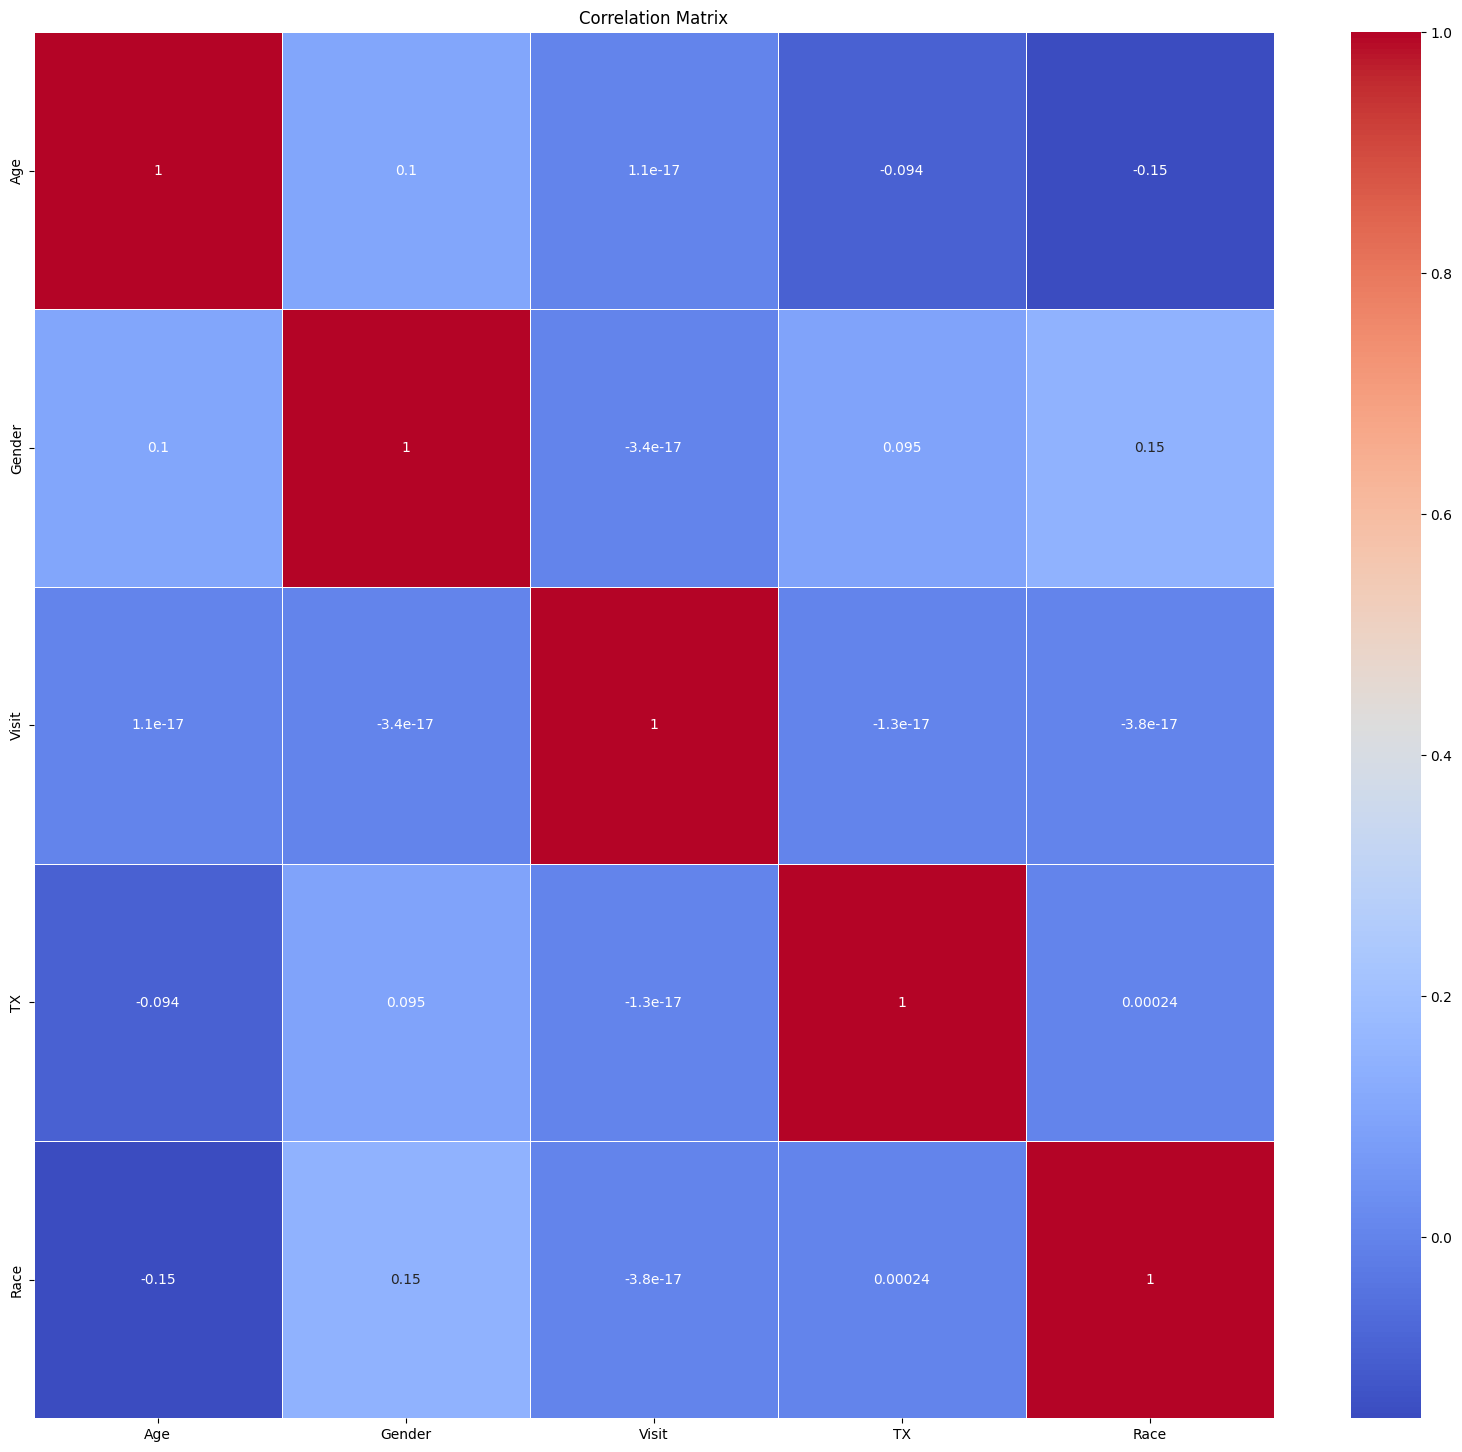

In [18]:
# function to calculate correlation matrix and plot it
def visualize_correlation_matrix(correlation_matrix):
    # Create a heatmap using seaborn
    plt.figure(figsize=(20, 18))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

# Calculate correlation matrix
correlation_matrix = normalized_df.corr()
# visualize
visualize_correlation_matrix(correlation_matrix)


### identify strong correlations

In [19]:
def identify_strong_correlations(correlation_matrix, threshold=0.7):
    # Find the indices of strongly correlated features
    n_features = correlation_matrix.shape[0]
    strongly_correlated = []
    
    for i in range(n_features):
        for j in range(i+1, n_features):
            if abs(correlation_matrix.iloc[i, j]) >= threshold:
                strongly_correlated.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
    
    return strongly_correlated

# Set a correlation threshold
threshold = 0.5

# Find strongly correlated features
strong_correlations = identify_strong_correlations(correlation_matrix, threshold)
strong_correlations_df = pd.DataFrame(strong_correlations, columns=['feature1','feature2','correlation'])
strong_correlations_df


,feature1,feature2,correlation


### Perform Spearman correlations

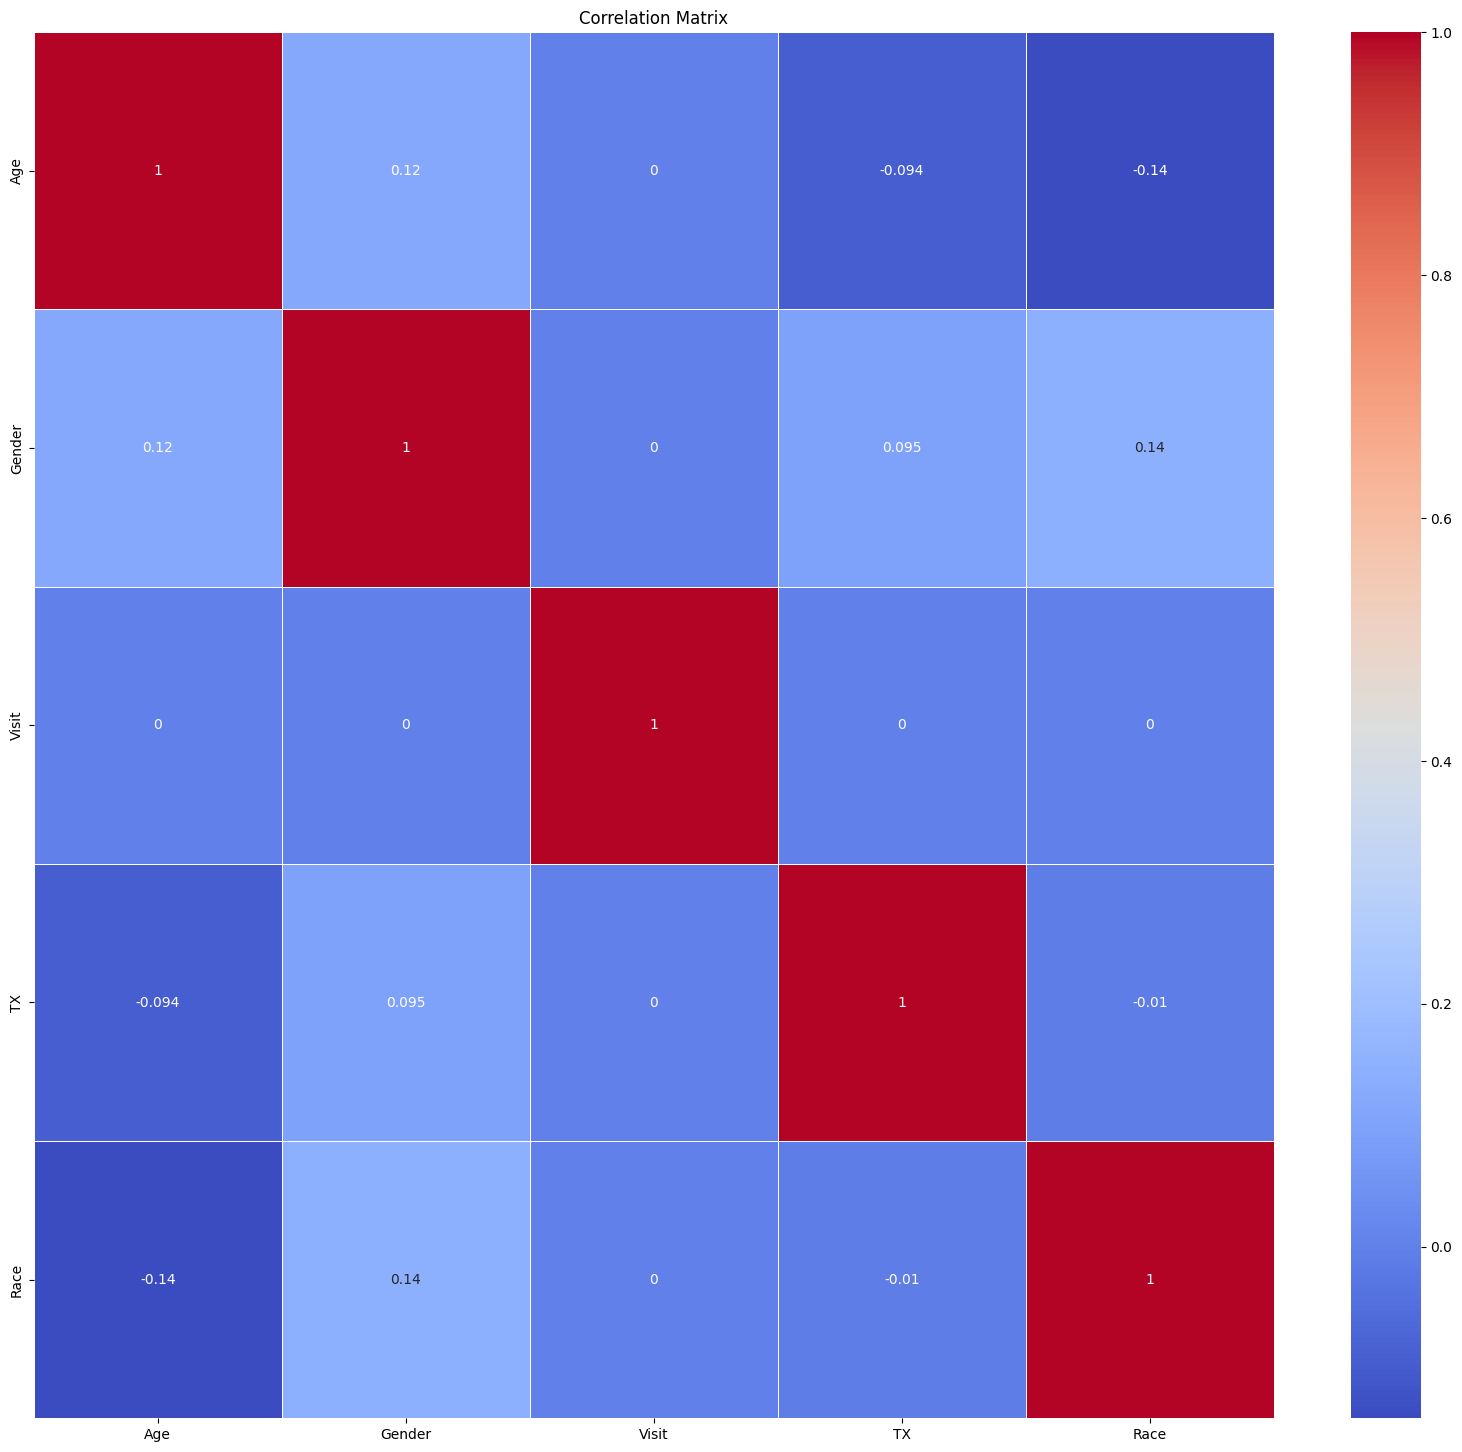

In [20]:
def calculate_spearman_correlation(df):
    # Calculate the Spearman correlation matrix
    spearman_corr_matrix = df.corr(method='spearman')
    
    return spearman_corr_matrix

spearman_corr_matrix = calculate_spearman_correlation(normalized_df)

# visualize
visualize_correlation_matrix(spearman_corr_matrix)

In [21]:
# Find strongly correlated features in spearman
strong_correlations = identify_strong_correlations(spearman_corr_matrix, threshold)
strong_correlations_df = pd.DataFrame(strong_correlations, columns=['feature1_spear','feature2_spear','correlation'])
strong_correlations_df


,feature1_spear,feature2_spear,correlation


## t-SNE
The primary purpose of t-SNE is to map each data point from its original high-dimensional space to a lower-dimensional (usually 2D or 3D) space while preserving the local and global structure of the data. It achieves this by measuring pairwise similarities between data points 

d:\softwares\miniconda\envs\DEEPLABCUT\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


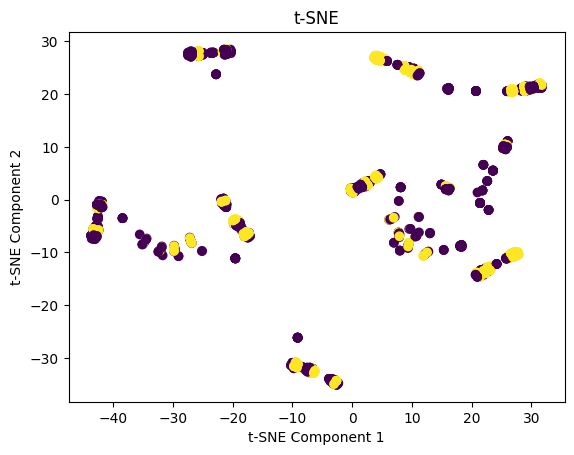

In [22]:


def apply_tsne(df, target_col=None, perplexity=30, learning_rate=200, n_iter=1000, random_state=None):

    # Extract the target column (if provided)
    if target_col is not None:
        y = df[target_col].values
        df = df.drop(columns=[target_col])
    else:
        y = None

    # Apply t-SNE transformation
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=random_state)
    tsne_result = tsne.fit_transform(df)

    # Create a new DataFrame with the t-SNE transformed data and the target column (if provided)
    tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE Component 1", "t-SNE Component 2"])
    if target_col is not None:
        tsne_df[target_col] = y

    return tsne_df


tsne_result = apply_tsne(normalized_df, target_col='Gender', perplexity=40, learning_rate=200, n_iter=1000, random_state=42)
plt.scatter(tsne_result["t-SNE Component 1"], tsne_result["t-SNE Component 2"], c=tsne_result["Gender"])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE')
plt.show()


In [23]:
tsne_result.head()

,t-SNE Component 1,t-SNE Component 2,Gender
0,-6.648681,-32.067924,0
1,-6.648681,-32.067924,0
2,-6.648681,-32.067924,0
3,-6.648681,-32.067924,0
4,-6.992335,-32.842377,0


In [24]:
one = tsne_result['t-SNE Component 1'].values.tolist()
two = tsne_result['t-SNE Component 2'].values.tolist()
normalized_df['t-SNE Component 1'] = one
normalized_df['t-SNE Component 2'] = two

### K means clustering

In [25]:
def select_most_important_features(df, num_clusters=5, num_features=3):
    # Assuming you have added t-SNE components to the DataFrame as 't-SNE Component 1' and 't-SNE Component 2'
    tsne_components = df[['t-SNE Component 1', 't-SNE Component 2']]

    # Perform K-means clustering on t-SNE components
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(tsne_components)

    # Group DataFrame by cluster labels
    grouped_data = df.groupby('Cluster')

    # Calculate feature importance (variance in this example)
    feature_importance = grouped_data.var()

    # Select the most important features based on variance
    most_important_features = feature_importance.mean().nlargest(num_features).index.tolist()

    return most_important_features


selected_features = select_most_important_features(normalized_df, num_clusters=6, num_features=10)
print(selected_features)


['t-SNE Component 1', 't-SNE Component 2', 'Visit', 'Race', 'Gender', 'TX', 'Age']
